<div style="font-size:18px; font-family:'calibri'; direction:rtl; color:purple; text-align:right">
   <p style="text-align:center; font-size:18px; font-family:'calibri'; color:black">
        به نام خدا
                <br><br>
                <p style="text-align:right">
<br><br>مرجان چوداری میلانی
 <br><br>پروژه ی پایانی هوش مصنوعی پیشرفته
        <br><br>استاد مربوطه: آقای دکتر صیدی
       <br><br> تابستان 1400
 
</div>

<div style="text-align:right; font-size:18px; font-family:'calibri'; color:black; direction:rtl">
    <p style="text-align:right">
        تعریف مساله: <br>
        همانطور که میدانید گل آلود آب بر روی حیات جانداران دریایی و همچنین خوراک آنها
        تاثیرات بعضا جبران ناپذیری دارد.
       <br>
        به همین جهت در این مساله تغییرات ناخالصی آب را بررسی میکنیم که به علت 
        وجود رابطه ی مستقیم بین ناخالصی آب و شوری آن، از پارامتر شوری آب به عنوان observation استفاده کردیم.
    <br><br>
        ورودی های مساله:<br> پارامتر اصلی ما که با آن مدل را آموزش میدهیم، turbidity یا ناخالصی است که همانطور که پیشتر به آن اشاره کردیم از salinity یا شوری آب به عنوان observation استفاده میکنیم. 
    <br><br>
        خروجی های مساله:<br>
        به عنوان خروجی اول احتمال میزان خاصی از ناخالصی را پیشبینی میکنیم و به عنوان خروجی دوم دنباله ای از تغییرات ناخالصی آب که توسط مدل ساخته شده را بررسی کرده و در آن مقادیر را در لحظات مختلف پیشبینی میکنیم.
<br><br>
        نوع مساله:<br>
        مدل ما مدل مخفی مارکوف میباشد که فضای مساله stochastic است و مساله از نوع supervised (با نظارت) میباشد.
<br><br>
        ضرورت تحقیق:<br>
        همانطور که پیشتر گفتیم برای جلوگیری از انقراض گونه های نادر در دریا و همینطور به جهت بررسی تغذیه ی آنها لازم است گل آلود و ناخالص بودن آب مرتبا بررسی شود که در این تحقیق به این مهم کمک کردیم.

<br><p style="text-align:right">
        فرضیه تحقیق:<br>
    از همان ابتدا هدف ما بررسی تغییرات ناخالصی آب و تاثیرات آن بر حیات جانداران دریایی بود که در این مساله  تلاش کردیم زوایایی از این قضیه را مورد بررسی قرار دهیم.
    به علت اینکه در این مساله یک متغیر را مورد بررسی قرار دادیم و همچنین از یک متغیر دیگر به عنوان observation استفاده کردیم و همینطور داده های ما به صورت سری زمانی هستند طبیعتا از مدل مخفی مارکوف استفاده کردیم.
<br><br> 
    ارزیابی کار:<br>
    با توجه به اهمیت مساله که هدف اصلی آن جلوگیری از انقراض گونه های پر ارزش دریایی هست؛ به نظر بنده این مساله از اهمیت بالایی برخوردار است.

</div>

<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
در این بخش کتابخانه های مورد استفاده را معرفی کردیم.
    </p>

In [105]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
%matplotlib inline

<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
فایل داده هارا باز کردیم.
    </p>

In [33]:
data= ps.read_csv("data.csv")

<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
نمایش داده ها
    </p>

In [34]:
data.head()


,Unnamed: 0,deployment_id,measurement_datetime,parameter_id,parameter_name,parameter_detail,parameter_units,value_double
0,589458,34,2020-03-11 12:03:39,45,water_temperature,Water Temperature,C,7.721
1,589459,34,2020-03-11 12:03:39,44,salinity,Salinity,PPT,33.590
2,589460,34,2020-03-11 12:03:39,20,depth,Instument depth,m,2.454
3,589463,34,2020-03-11 12:02:39,45,water_temperature,Water Temperature,C,7.720
4,589464,34,2020-03-11 12:02:39,44,salinity,Salinity,PPT,33.598


<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
ستون هایی که مورد نیاز نیستند را حذف کردیم.
    </p>

In [35]:
data=data.drop(columns=['Unnamed: 0','deployment_id','parameter_id','parameter_detail','parameter_units'])
data.head()

,measurement_datetime,parameter_name,value_double
0,2020-03-11 12:03:39,water_temperature,7.721
1,2020-03-11 12:03:39,salinity,33.590
2,2020-03-11 12:03:39,depth,2.454
3,2020-03-11 12:02:39,water_temperature,7.720
4,2020-03-11 12:02:39,salinity,33.598


<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
اسم پارامتر هارا داخل یک آرایه ریختیم و به صورت یکتا نمایش دادیم.
    </p>

In [36]:
parameter_names=data['parameter_name'].values
parameter_names=np.unique(parameter_names)
parameter_names

array(['awac-amp1', 'awac-amp2', 'awac-amp3', 'awac-blanking',
       'awac-cells', 'awac-direction', 'awac-mean-an1', 'awac-mean-an2',
       'awac-speed', 'awac-unidirectionality', 'awac-vel1', 'awac-vel2',
       'awac-vel3', 'chlorophyll-a', 'depth', 'directional-variance',
       'largest-wave', 'max_sea_water_absolute_pressure',
       'mean-hydrostatic-pressure', 'mean-large-waves',
       'mean-wave-direction', 'mean-wave-period', 'mean-wave-period-z',
       'min_sea_water_absolute_pressure', 'peak-wave-direction',
       'peak-wave-period', 'phys_meas_dep', 'rel_bot_press',
       'relative_humidity', 'salinity', 'salinity-psu', 'sea_level',
       'sea_water_absolute_pressure', 'sig-wave-height0',
       'sig-wave-height3', 'sound-velocity', 'specific-conductivity',
       'turbidity', 'water_temperature'], dtype=object)

<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
زمان های ثبت پارامتر هارا به صورت یکتا نمایش میدهیم و آن هارا مرتب میکنیم.
    </p>

In [37]:
measurement_datetime_unique=np.unique(data['measurement_datetime'])
measurement_datetime_unique.sort()
len(measurement_datetime_unique)

204447

<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
این تابع برای پیدا کردن مقادیر پارامتر ها در هر لحظه استفاده میشود
    </p>

In [108]:
def find_param(time):
    df = data.loc[(data['measurement_datetime'] == time)]
    parameter_names = df['parameter_name'].values
    result=[]
    for param in parameter_names:
        df2 = df.loc[(df['parameter_name'] == param)].values[0]
        result.append((df2[1],df2[2]))
    return(result)


<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
بازه ی زمانی مورد نظر که در اینجا یک ماه هست را مشخص میکنیم.
    </p>

In [79]:
time_range='2018-09'
time_range2='2018-10'
target_times=[]
for time in measurement_datetime_unique:
    if time_range in time:
        target_times.append(time)
print(len(target_times))
df=data.loc[(data['measurement_datetime'] > time_range) & (data['measurement_datetime'] < time_range2)]
print(np.unique(df['parameter_name'].values))
print(len(np.unique(df['parameter_name'].values)))

1930
['awac-amp1' 'awac-amp2' 'awac-amp3' 'awac-blanking' 'awac-cells'
 'awac-direction' 'awac-mean-an1' 'awac-mean-an2' 'awac-speed'
 'awac-unidirectionality' 'awac-vel1' 'awac-vel2' 'awac-vel3'
 'chlorophyll-a' 'directional-variance' 'largest-wave'
 'mean-hydrostatic-pressure' 'mean-large-waves' 'mean-wave-direction'
 'mean-wave-period' 'mean-wave-period-z' 'peak-wave-direction'
 'peak-wave-period' 'rel_bot_press' 'salinity-psu'
 'sea_water_absolute_pressure' 'sig-wave-height0' 'sig-wave-height3'
 'sound-velocity' 'specific-conductivity' 'turbidity' 'water_temperature']
32


<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
پارامترهای موجود در بازه ی زمانی را در هر لحظه استحراج میکنیم و در یک دیتافریم جدید میریزیم.
    </p>

In [85]:
import time
tt = time.time()
t=0
k=0
finaldf = {'time':[], 'turbidity':[], 'salinity':[]}
finaldf = ps.DataFrame(finaldf)
turbidity, salinity = [0 for _ in range(2)]
for timeing in target_times:
    if k >0:
        params = find_param(timeing)
        for param, value in params :
            if param == 'turbidity':
                turbidity = value
            if param == 'salinity-psu':
                salinity = value
        new_row = {'time':t, 'turbidity':turbidity, 'salinity':salinity}
        finaldf = finaldf.append(new_row, ignore_index=True)
        print(str(timeing))
        t = t+1
    k = k+1
elapsed = time.time() - tt
elapsed

2018-09-13 12:40:00
2018-09-13 13:00:00
2018-09-13 13:20:00
2018-09-13 13:40:00
2018-09-13 14:00:00
2018-09-13 14:20:00
2018-09-13 14:21:00
2018-09-13 14:24:00
2018-09-13 14:40:00
2018-09-13 15:00:00
2018-09-13 15:01:00
2018-09-13 15:04:00
2018-09-13 15:20:00
2018-09-13 15:24:00
2018-09-13 15:40:00
2018-09-13 15:44:00
2018-09-13 16:00:00
2018-09-13 16:20:00
2018-09-13 16:21:00
2018-09-13 16:24:00
2018-09-13 16:40:00
2018-09-13 17:00:00
2018-09-13 17:01:00
2018-09-13 17:20:00
2018-09-13 17:21:00
2018-09-13 17:24:00
2018-09-13 17:40:00
2018-09-13 17:44:00
2018-09-13 18:00:00
2018-09-13 18:04:00
2018-09-13 18:20:00
2018-09-13 18:40:00
2018-09-13 19:00:00
2018-09-13 19:20:00
2018-09-13 19:40:00
2018-09-13 19:46:05
2018-09-13 20:00:00
2018-09-13 20:20:00
2018-09-13 20:24:00
2018-09-13 20:40:00
2018-09-13 21:00:00
2018-09-13 21:04:00
2018-09-13 21:20:00
2018-09-13 21:24:00
2018-09-13 21:40:00
2018-09-13 22:00:00
2018-09-13 22:01:00
2018-09-13 22:20:00
2018-09-13 22:21:00
2018-09-13 22:40:00


2018-09-17 04:00:00
2018-09-17 04:04:00
2018-09-17 04:20:00
2018-09-17 04:24:00
2018-09-17 04:40:00
2018-09-17 04:44:00
2018-09-17 05:00:00
2018-09-17 05:20:00
2018-09-17 05:21:00
2018-09-17 05:24:00
2018-09-17 05:40:00
2018-09-17 06:00:00
2018-09-17 06:20:00
2018-09-17 06:40:00
2018-09-17 06:41:00
2018-09-17 06:44:00
2018-09-17 07:00:00
2018-09-17 07:04:00
2018-09-17 07:20:00
2018-09-17 07:24:00
2018-09-17 07:40:00
2018-09-17 08:00:00
2018-09-17 08:10:03
2018-09-17 08:20:00
2018-09-17 08:24:00
2018-09-17 08:40:00
2018-09-17 09:00:00
2018-09-17 09:20:00
2018-09-17 09:24:00
2018-09-17 09:40:00
2018-09-17 10:00:00
2018-09-17 10:20:00
2018-09-17 10:40:00
2018-09-17 10:40:04
2018-09-17 11:00:00
2018-09-17 11:01:00
2018-09-17 11:20:00
2018-09-17 11:40:00
2018-09-17 12:00:00
2018-09-17 12:01:00
2018-09-17 12:04:00
2018-09-17 12:20:00
2018-09-17 12:40:00
2018-09-17 12:41:00
2018-09-17 13:00:00
2018-09-17 13:01:00
2018-09-17 13:04:00
2018-09-17 13:20:00
2018-09-17 13:40:00
2018-09-17 13:41:00


2018-09-20 20:20:00
2018-09-20 20:40:00
2018-09-20 21:00:00
2018-09-20 21:06:03
2018-09-20 21:20:00
2018-09-20 21:40:00
2018-09-20 22:00:00
2018-09-20 22:04:00
2018-09-20 22:20:00
2018-09-20 22:40:00
2018-09-20 22:41:00
2018-09-20 23:00:00
2018-09-20 23:20:00
2018-09-20 23:21:00
2018-09-20 23:40:00
2018-09-21 00:00:00
2018-09-21 00:01:00
2018-09-21 00:20:00
2018-09-21 00:40:00
2018-09-21 00:41:00
2018-09-21 01:00:00
2018-09-21 01:20:00
2018-09-21 01:21:00
2018-09-21 01:24:00
2018-09-21 01:40:00
2018-09-21 02:00:00
2018-09-21 02:20:00
2018-09-21 02:40:00
2018-09-21 02:42:02
2018-09-21 03:00:00
2018-09-21 03:20:00
2018-09-21 03:40:00
2018-09-21 03:41:00
2018-09-21 03:44:00
2018-09-21 04:00:00
2018-09-21 04:20:00
2018-09-21 04:21:00
2018-09-21 04:40:00
2018-09-21 05:00:00
2018-09-21 05:10:02
2018-09-21 05:20:00
2018-09-21 05:40:00
2018-09-21 06:00:00
2018-09-21 06:04:00
2018-09-21 06:20:00
2018-09-21 06:24:00
2018-09-21 06:40:00
2018-09-21 07:00:00
2018-09-21 07:01:00
2018-09-21 07:20:00


2018-09-24 16:40:00
2018-09-24 17:00:00
2018-09-24 17:01:00
2018-09-24 17:20:00
2018-09-24 17:21:00
2018-09-24 17:24:00
2018-09-24 17:40:00
2018-09-24 18:00:00
2018-09-24 18:04:00
2018-09-24 18:20:00
2018-09-24 18:40:00
2018-09-24 19:00:00
2018-09-24 19:01:00
2018-09-24 19:04:00
2018-09-24 19:20:00
2018-09-24 19:40:00
2018-09-24 19:41:00
2018-09-24 20:00:00
2018-09-24 20:01:00
2018-09-24 20:04:00
2018-09-24 20:20:00
2018-09-24 20:24:00
2018-09-24 20:40:00
2018-09-24 20:44:00
2018-09-24 21:00:00
2018-09-24 21:20:00
2018-09-24 21:40:00
2018-09-24 21:41:00
2018-09-24 21:44:00
2018-09-24 22:00:00
2018-09-24 22:20:00
2018-09-24 22:40:00
2018-09-24 22:41:00
2018-09-24 23:00:00
2018-09-24 23:20:00
2018-09-24 23:40:00
2018-09-25 00:00:00
2018-09-25 00:20:00
2018-09-25 00:40:00
2018-09-25 00:41:00
2018-09-25 00:44:00
2018-09-25 01:00:00
2018-09-25 01:20:00
2018-09-25 01:40:00
2018-09-25 02:00:00
2018-09-25 02:20:00
2018-09-25 02:20:04
2018-09-25 02:24:00
2018-09-25 02:40:00
2018-09-25 03:00:00


2018-09-28 09:24:00
2018-09-28 09:40:00
2018-09-28 10:00:00
2018-09-28 10:01:00
2018-09-28 10:04:00
2018-09-28 10:20:00
2018-09-28 10:24:00
2018-09-28 10:40:00
2018-09-28 10:44:00
2018-09-28 11:00:00
2018-09-28 11:20:00
2018-09-28 11:21:00
2018-09-28 11:40:00
2018-09-28 12:00:00
2018-09-28 12:01:00
2018-09-28 12:20:00
2018-09-28 12:40:00
2018-09-28 12:41:00
2018-09-28 12:44:00
2018-09-28 13:00:00
2018-09-28 13:20:00
2018-09-28 13:40:00
2018-09-28 14:00:00
2018-09-28 14:00:04
2018-09-28 14:20:00
2018-09-28 14:40:00
2018-09-28 14:40:04
2018-09-28 15:00:00
2018-09-28 15:01:00
2018-09-28 15:04:00
2018-09-28 15:20:00
2018-09-28 15:24:00
2018-09-28 15:40:00
2018-09-28 16:00:00
2018-09-28 16:04:00
2018-09-28 16:20:00
2018-09-28 16:40:00
2018-09-28 17:00:00
2018-09-28 17:20:00
2018-09-28 17:40:00
2018-09-28 17:41:00
2018-09-28 17:44:00
2018-09-28 18:00:00
2018-09-28 18:20:00
2018-09-28 18:40:00
2018-09-28 19:00:00
2018-09-28 19:01:00
2018-09-28 19:04:00
2018-09-28 19:20:00
2018-09-28 19:24:00


1458.156274318695

In [90]:
#finaldf.to_csv(r'train-2018-04.csv')
#finaldf = pd.read_csv("train-2018-04.csv")
finaldf = finaldf.drop_duplicates(subset=['turbidity'])
finaldf

,time,turbidity,salinity
0,0.0,1.6,16.290000
2,2.0,1.5,16.410000
3,3.0,1.2,16.280000
4,4.0,1.1,16.170000
9,9.0,1.4,16.283333
...,...,...,...
1915,1915.0,8.1,16.506667
1917,1917.0,8.4,16.516667
1919,1919.0,9.8,16.390000
1921,1921.0,9.5,16.390000


<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
پارامترهایی را که در بالا بدست آوردیم را در دو آرای میریزیم
    </p>

In [91]:
turbidity_arr = finaldf['turbidity'].values
turbidity=[]
for i in turbidity_arr:
    turbidity.append([i])
salinity_arr = finaldf['salinity'].values
salinity=[]
for i in salinity_arr:
    salinity.append([i])
del salinity[0]
print('turbidity : ' + str(len(turbidity)))
print('salinity : ' + str(len(salinity)))

turbidity : 82
salinity : 81


In [93]:
from hmmlearn import hmm

<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
آرایه های بالا را به هم میچسبانیم تا به مدل وارد کنیم.
    </p>

In [94]:
X = np.concatenate([turbidity, salinity])
lengths = [len(turbidity), len(salinity)]

<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
مدل مخفی مارکوف را میسازیم و بر اساس داده ها آموزش میدهیم.
    تعداد stateهای قبلی ما که آن هارا بررسی میکنیم 10 عدد است. 
    </p>

In [96]:
num_components = 10
hmm_model = hmm.GaussianHMM(n_components=num_components).fit(X, lengths)
hmm_model

GaussianHMM(n_components=10)

<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
در خروجی اول احتمال وقوع میزان خاصی از ناخالصی را پیشبینی میکنیم
    </p>

In [97]:
probability=hmm_model.decode([[2.1]])
print(np.exp([probability[0]]))

[0.17134872]


<p style="text-align:right; font-size:18px; font-family:'calibri'; color:green; direction:rtl">
در خروجی دوم دنباله ای از تغییرات ناخالصی آب که از sample های ایجاد شده براساس مدلی که آموزش دادیم، ساخته ایم را بررسی میکنیم. 
    </p>

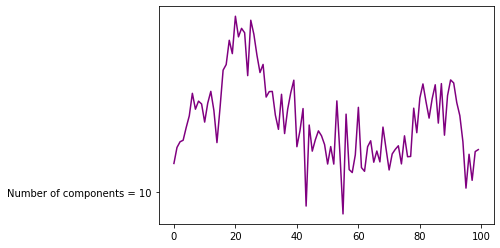

In [111]:
num_samples = 100
samples, _=hmm_model.sample(num_samples)
plt.plot(np.arange(num_samples), samples[:,0], c='purple')
plt.plot('Number of components = ' + str(num_components))

plt.show()